
HW7:Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density 
and all others with zero density) using SOR 

$$ \nabla^2 \phi(r) = 4 \pi G \rho = \frac{\partial^2 \phi}{\partial^2 x} + \frac{\partial^2 \phi}{\partial^2 y}$$

Initializing
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


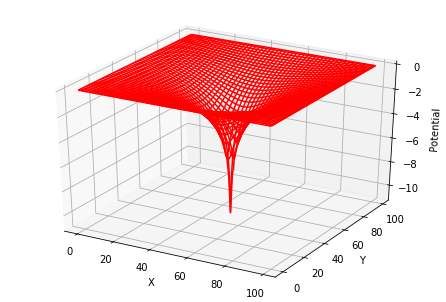

In [1]:
'''
HW:7 
Daniel Schacher
'''

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;

print("Initializing")
omega=1.0
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float)   
rho = zeros((Nmax, Nmax))
rho[50][50] = 1
G = 1.0
            
    
for iter in range(Niter):                                  
    if iter%100 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]-(pi*rho[i,j]*G)
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omega*du 
 
    #print(maxerr)
    if(maxerr<1.e-5):
        break
            
    x = range(0, Nmax, 1)
    y = range(0, Nmax, 1)                              
    X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

Next we plot the anylitc expression
$$ \phi(r)=2G\mu \log{r} +c \qquad \text{where} \qquad c=-8$$
verse a slice of the numeric solution across the diagonal

Mean squared error:  0.5256830661031178


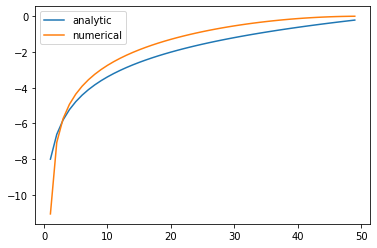

In [2]:
radial = lambda r, c: 2*log(r) + c
x1 = []
z2 = []
for i in range(1,50):
    x1.append(X.diagonal()[i])
    z2.append(Z.diagonal()[49+i])
x1 = array(x1)
z1 = radial(x1,-8)
p.plot(x1,z1)
p.plot(x1,z2)
p.legend(["analytic","numerical"])
print("Mean squared error: ",sum((z2-z1)**2 / z1.shape))